In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import plotly.graph_objects as go
from pprint import pprint
from collections import defaultdict
from json import load
import os

In [2]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [3]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

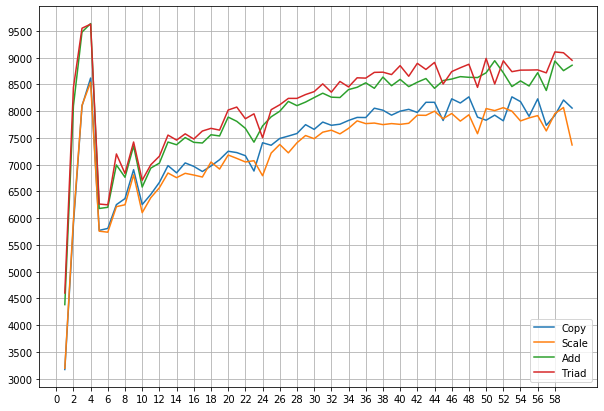

In [4]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [12]:
result_path = "../result"
alg_files = os.listdir(result_path)
alg_res_regex = r"^(.*)-T([\d]{1,2})-R([\d]{1,3}).json$"
# print(alg_files)

data = dict()

for alg in alg_files:
    if ".json" not in alg:
        continue
    di = load(open(os.path.join(result_path, alg), 'r'))
    grps = re.match(alg_res_regex, alg)
    alg_name = grps.group(1)
    thread = int(grps.group(2))
    rounds = grps.group(3)
    
    alg_d = dict()
    if thread not in data:
        data[thread] = dict()

    for k, v in di.items():
        fn, nthr, func = list(map(str.strip, k.split(",")))
        size = 0
        try:
            size = int(re.match(r"^data/map/size-(\d{1,}).csv$", fn).group(1))
        except AttributeError:
            size = int(fn)
        if size not in alg_d:
            alg_d[size] = dict()
        alg_d[size][func] = v["nanos"] + (v["secs"]*1e9)
    data[thread][alg_name] = alg_d
pprint(data)

{1: {'map': {1048576: {'half_split_Multiply': 4210780.0,
                       'rayon_par_iter_Multiply': 4590408.0,
                       'sqrt_n_Multiply': 5717943.0},
             2097152: {'half_split_Multiply': 24220866.0,
                       'rayon_par_iter_Multiply': 24074854.0,
                       'sqrt_n_Multiply': 26400384.0},
             8388608: {'half_split_Multiply': 105812384.0,
                       'rayon_par_iter_Multiply': 101287088.0,
                       'sqrt_n_Multiply': 117827696.0},
             16777216: {'half_split_Multiply': 195613440.0,
                        'rayon_par_iter_Multiply': 194231232.0,
                        'sqrt_n_Multiply': 225163616.0},
             33554432: {'half_split_Multiply': 382086592.0,
                        'rayon_par_iter_Multiply': 368993792.0,
                        'sqrt_n_Multiply': 431271456.0},
             67108864: {'half_split_Multiply': 754742016.0,
                        'rayon_par_iter_Multiply': 72

              16777216: {'par_scan': 22676100.0, 'rayon_sum': 4191716.0},
              33554432: {'par_scan': 43892088.0, 'rayon_sum': 8694439.0},
              67108864: {'par_scan': 86423600.0, 'rayon_sum': 19536864.0},
              134217728: {'par_scan': 162277984.0, 'rayon_sum': 39367524.0}}},
 12: {'map': {1048576: {'half_split_Multiply': 1102638.0,
                        'rayon_par_iter_Multiply': 1235714.0,
                        'sqrt_n_Multiply': 1665172.0},
              2097152: {'half_split_Multiply': 6774757.0,
                        'rayon_par_iter_Multiply': 6744640.0,
                        'sqrt_n_Multiply': 7970647.0},
              8388608: {'half_split_Multiply': 29015918.0,
                        'rayon_par_iter_Multiply': 29435056.0,
                        'sqrt_n_Multiply': 34139740.0},
              16777216: {'half_split_Multiply': 60459328.0,
                         'rayon_par_iter_Multiply': 59405456.0,
                         'sqrt_n_Multiply': 63

                        'rayon_par_iter_Multiply': 31321302.0,
                        'sqrt_n_Multiply': 35492876.0},
              16777216: {'half_split_Multiply': 63883176.0,
                         'rayon_par_iter_Multiply': 63335144.0,
                         'sqrt_n_Multiply': 64021916.0},
              33554432: {'half_split_Multiply': 126101192.0,
                         'rayon_par_iter_Multiply': 126468984.0,
                         'sqrt_n_Multiply': 119022312.0},
              67108864: {'half_split_Multiply': 256782528.0,
                         'rayon_par_iter_Multiply': 257838752.0,
                         'sqrt_n_Multiply': 215636528.0},
              134217728: {'half_split_Multiply': 534899520.0,
                          'rayon_par_iter_Multiply': 531566368.0,
                          'sqrt_n_Multiply': 415058720.0}},
      'qs': {2: {'par_quick_sort (in-place)': 3339.0,
                 'par_quick_sort (non-in-place)': 3154.0,
                 'par_quick_sort

In [18]:
data[24]['qs']

{1024: {'par_quick_sort (in-place)': 71993.0,
  'par_quick_sort (non-in-place)': 71400.0,
  'par_quick_sort (rayon)': 69475.0,
  'par_sample_sort (in-place)': 69665.0},
 1048576: {'par_quick_sort (in-place)': 14952514.0,
  'par_quick_sort (non-in-place)': 64067410.0,
  'par_quick_sort (rayon)': 15777751.0,
  'par_sample_sort (in-place)': 15480889.0},
 128: {'par_quick_sort (in-place)': 9016.0,
  'par_quick_sort (non-in-place)': 8957.0,
  'par_quick_sort (rayon)': 6421.0,
  'par_sample_sort (in-place)': 6427.0},
 131072: {'par_quick_sort (in-place)': 2181220.0,
  'par_quick_sort (non-in-place)': 23367428.0,
  'par_quick_sort (rayon)': 2174384.0,
  'par_sample_sort (in-place)': 2201470.0},
 134217728: {'par_quick_sort (in-place)': 2226568969.0,
  'par_quick_sort (non-in-place)': 4350251667.0,
  'par_quick_sort (rayon)': 1694217853.0,
  'par_sample_sort (in-place)': 1711677545.0},
 16: {'par_quick_sort (in-place)': 3219.0,
  'par_quick_sort (non-in-place)': 3174.0,
  'par_quick_sort (rayo

sample_sort par
sample_sort seq


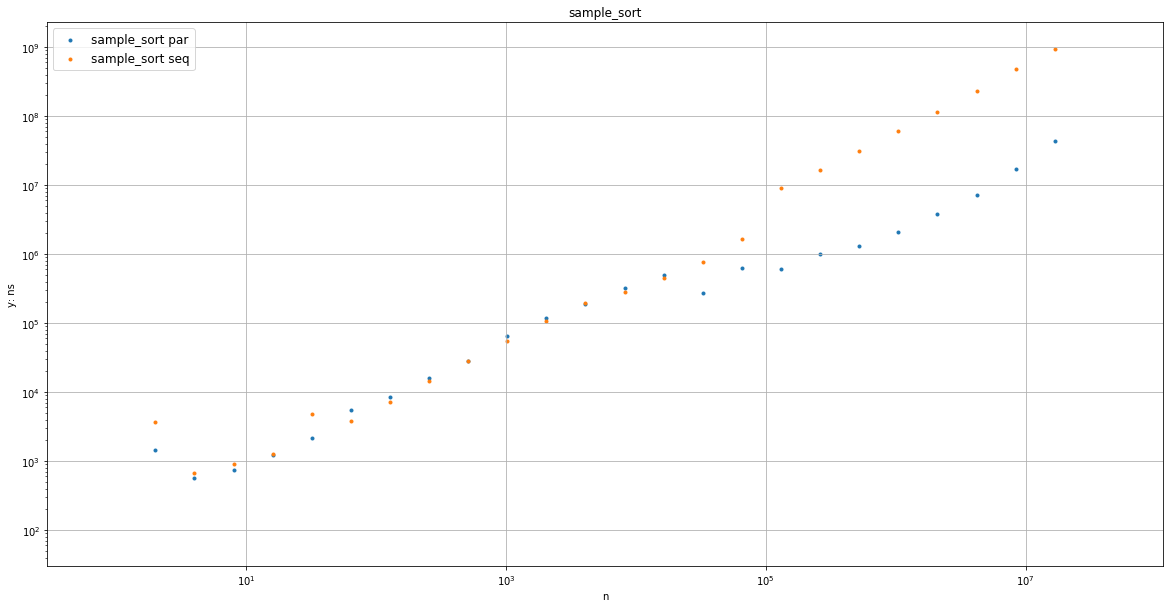

par_scan
rayon_sum


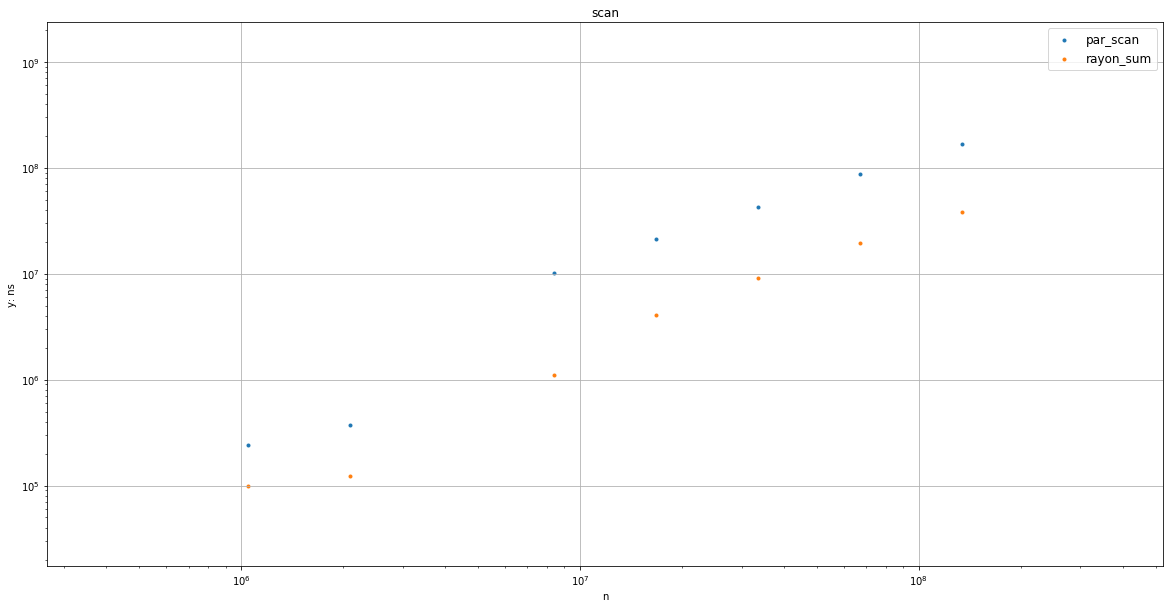

half_split_Multiply
rayon_par_iter_Multiply
sqrt_n_Multiply


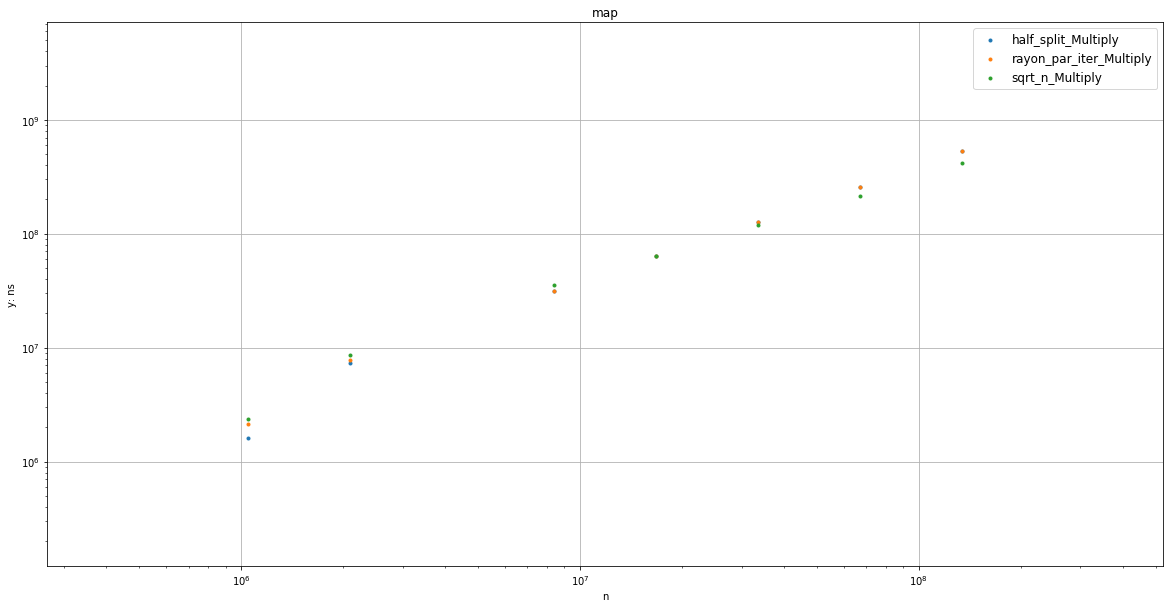

par_quick_sort (in-place)
par_quick_sort (non-in-place)
par_quick_sort (rayon)
par_sample_sort (in-place)


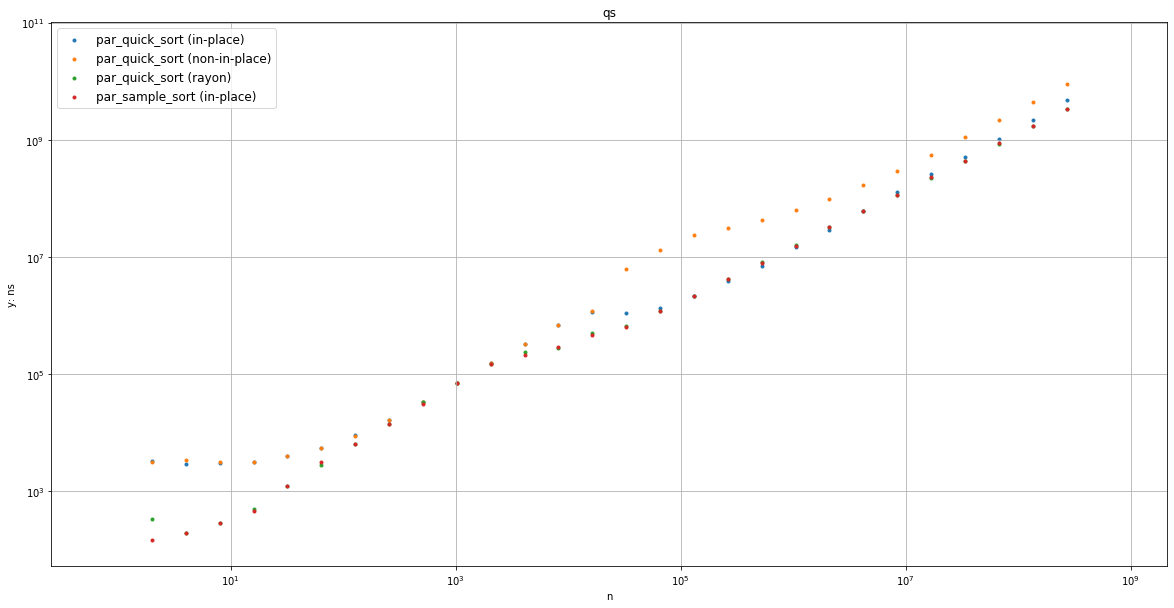

In [13]:
result = dict()
for alg, d in data[24].items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)

for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='.')
    plt.legend(fontsize="large")
    plt.grid()
    plt.show()

In [12]:
result = dict()
for tn, items in data.items():
    for alg, d in items.items():
        if alg not in result:
            result[alg] = dict()
        for size, map_ver in d.items():
            for ver, tm in map_ver.items():
                if ver not in result[alg]:
                    result[alg][ver] = {"x":[], "y": [], "z":[]}
                result[alg][ver]["x"].append(size)
                result[alg][ver]["y"].append(tm)
                result[alg][ver]["z"].append(tn)
result


{'scan': {'par_scan': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608,
    1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608,
    1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608],
   'y': [320996.0,
    141568752.0,
    19342184.0,
    623639.0,
    37691716.0,
    74514856.0,
    9451455.0,
    32112512.0,
    4156685824.0,
    546843520.0,
    63163260.0,
    1061152192.0,
    2117551360.0,
    269482368.0,
    9579936.0,
    1201594624.0,
    151831232.0,
    21274020.0,
    302157632.0,
    607533120.0,
    81355792.0],
   'z': [24,
    24,
    24,
    24,
    24,
    24,
    24,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    20,
    20,
    20,
    20,
    20,
    20,
    20]},
  'rayon_sum': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608,
    1048576,
    134217728,
    16777216,
    2097152,